In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("./datasets/heart.csv")

In [2]:
df.info()
#if this had shown any object datatypes, it would have been required to convert them to int/float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [3]:
df.isnull().sum()
#0 in all features, so there is no null values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
X = df.drop('target', axis=1)
y = df['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

In [77]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=4, random_state=43).fit(X_train, y_train)

In [78]:
y_pred = model.predict(X_test)

In [79]:
from sklearn.metrics import classification_report

result = classification_report(y_pred,y_test)

In [80]:
print(result)

              precision    recall  f1-score   support

           0       0.68      0.95      0.79        20
           1       0.97      0.78      0.86        41

    accuracy                           0.84        61
   macro avg       0.82      0.87      0.83        61
weighted avg       0.87      0.84      0.84        61



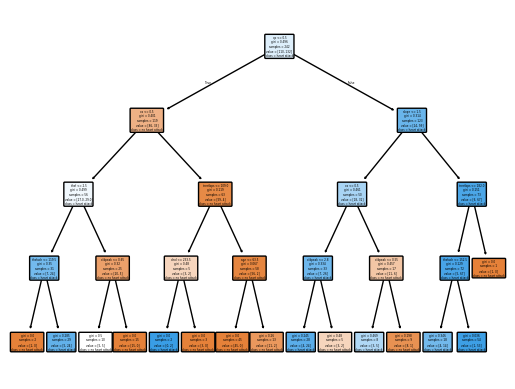

In [81]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

plot_tree(model, feature_names
=df.columns, class_names=['no heart attack', 'heart attack'], filled=True, rounded=True, ax=ax)

plt.show()
fig.savefig('./assets/decision_tree_hearts',dpi=300)